In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from xgboost import XGBRegressor, plot_importance
from sklearn.feature_selection import SelectFromModel
plt.style.use('seaborn')

In [36]:
gold_complete = pd.read_csv('../data/gold_feature.csv', index_col=0)
bitCoin = pd.read_csv('../data/bitCoin_feature.csv', index_col=0)

##  1.添加波动率和收益率作为新的特征

In [37]:
gold_profit = pd.read_csv('../data/R_Volatility/r_gold.csv', index_col=0)
bitCoin_profit = pd.read_csv('../data/R_Volatility/r_bitCoin.csv', index_col=0)
gold_volatility = pd.read_csv('../data/R_Volatility/Volatility_gold.csv', index_col=0)
bitCoin_volatility = pd.read_csv('../data/R_Volatility/Volatility_bitCoin.csv', index_col=0)

###  1.1黄金的处理

In [38]:
# 最后一天的收益率暂且设置为前一天的值
print('gold_profit : ', gold_profit.shape)
print('gold_volatility : ', gold_volatility.shape)
gold_profit.loc[len(gold_profit)+1] = {'x' : gold_profit['x'][len(gold_profit)]}
gold_volatility.loc[len(gold_volatility)+1] = {'V1' : gold_volatility['V1'][len(gold_volatility)]}
print('gold_profit : ', gold_profit.shape)
print('gold_volatility : ', gold_volatility.shape)

gold_profit :  (1825, 1)
gold_volatility :  (1825, 1)
gold_profit :  (1826, 1)
gold_volatility :  (1826, 1)


In [39]:
# 特征添加成功
gold_complete['profit'] = gold_profit.values
gold_complete['Volatility'] = gold_volatility.values
gold_complete 

,Date,USD (PM),SMA10,SMA20,SMA30,MACD,MACDsignal,MACDhist,EMA12,EMA26,...,SINE,LEADSINE,INPHASE,QUADRATURE,APO,PPO,CMO,TRIX,profit,Volatility
0,2016-09-11,1324.60,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,0.000000,0.007207
1,2016-09-12,1324.60,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.000717,0.007110
2,2016-09-13,1323.65,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.001435,0.007017
3,2016-09-14,1321.75,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.008284,0.006928
4,2016-09-15,1310.80,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.001869,0.006973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,1821.60,49093.547,48394.7485,47543.381333,1755.210453,1803.524835,-48.314382,49948.022008,49145.729833,...,-0.912095,-0.934847,-1167.524697,692.399758,986.273333,2.058184,33.408345,0.542504,-0.010677,0.006789
1822,2021-09-07,1802.15,49455.601,48796.1900,47811.490333,1906.923538,1824.204576,82.718963,50727.844292,49689.063705,...,0.926760,0.389692,-53.250602,2888.988696,1023.282244,2.123373,37.605671,0.547589,-0.008962,0.006930
1823,2021-09-08,1786.00,49246.753,48897.7555,47911.258000,1535.934833,1766.550627,-230.615795,49608.223065,49246.003135,...,0.813079,0.163290,1186.945742,2516.770176,918.503205,1.902319,-4.342653,0.549024,0.001260,0.006992
1824,2021-09-09,1788.25,48973.913,48864.9420,47902.755333,1169.473997,1647.135301,-477.661305,48599.696475,48758.676499,...,0.563104,-0.186169,1893.287141,1481.972548,737.819615,1.530244,-8.099856,0.546846,0.003551,0.006903


###  1.2比特币的处理

In [40]:
# 最后一天的收益率暂且设置为前一天的值
bitCoin_profit.loc[len(bitCoin_profit)+1] = {'x' : bitCoin_profit['x'][len(bitCoin_profit)]}
bitCoin_volatility.loc[len(bitCoin_volatility)+1] = {'V1' : bitCoin_volatility['V1'][len(bitCoin_volatility)]}
bitCoin['profit'] = bitCoin_profit.values
bitCoin['Volatility'] = bitCoin_volatility.values
bitCoin

,Date,Value,SMA10,SMA20,SMA30,MACD,MACDsignal,MACDhist,EMA12,EMA26,...,SINE,LEADSINE,INPHASE,QUADRATURE,APO,PPO,CMO,TRIX,profit,Volatility
0,2016-09-11,621.65,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.019271,0.041424
1,2016-09-12,609.67,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,0.002050,0.040234
2,2016-09-13,610.92,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.003437,0.038579
3,2016-09-14,608.82,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,0.002562,0.037110
4,2016-09-15,610.38,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.002081,0.035722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,51769.06,49093.547,48394.7485,47543.381333,1755.210453,1803.524835,-48.314382,49948.022008,49145.729833,...,-0.912095,-0.934847,-1167.524697,692.399758,986.273333,2.058184,33.408345,0.542504,0.017546,0.032142
1822,2021-09-07,52677.40,49455.601,48796.1900,47811.490333,1906.923538,1824.204576,82.718963,50727.844292,49689.063705,...,0.926760,0.389692,-53.250602,2888.988696,1023.282244,2.123373,37.605671,0.547589,-0.111399,0.031565
1823,2021-09-08,46809.17,49246.753,48897.7555,47911.258000,1535.934833,1766.550627,-230.615795,49608.223065,49246.003135,...,0.813079,0.163290,1186.945742,2516.770176,918.503205,1.902319,-4.342653,0.549024,-0.015612,0.046123
1824,2021-09-09,46078.38,48973.913,48864.9420,47902.755333,1169.473997,1647.135301,-477.661305,48599.696475,48758.676499,...,0.563104,-0.186169,1893.287141,1481.972548,737.819615,1.530244,-8.099856,0.546846,0.006300,0.044519


In [41]:
# 保存
gold_complete.to_csv('../data/gold_VR.csv')
bitCoin.to_csv('../data/bitCoin_VR.csv')

至此，我们成功添加了收益率和波动率作为新的特征

## 2.相关系数筛选特征

### 2.1 黄金

In [42]:
gold_VR = pd.read_csv('../data/gold_VR.csv', index_col=0)

<AxesSubplot:>

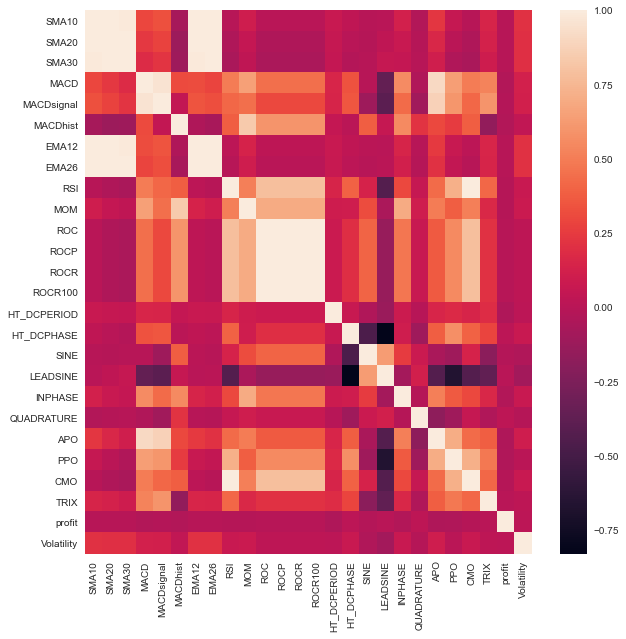

In [43]:
# 绘制热力图
gold_features=gold_VR.iloc[:, 2:]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(gold_features.corr(),annot=False)

<AxesSubplot:>

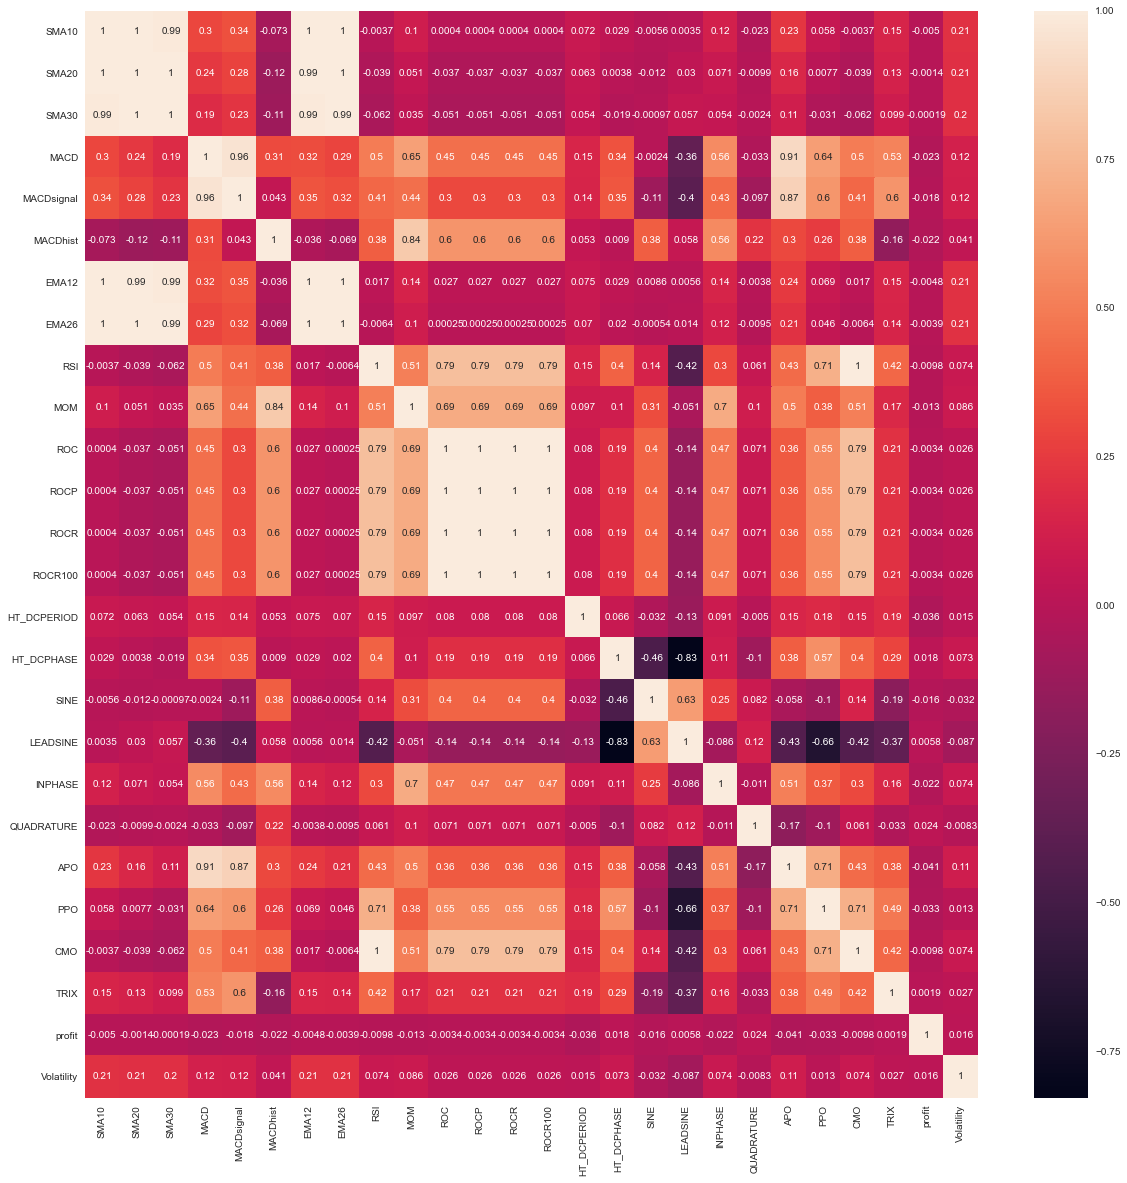

In [44]:
# 这个图用来观察相关系数的值
plt.figure(figsize=(20,20))
sns.heatmap(gold_features.corr(),annot=True)

In [45]:
# 特征的名字
col_names = list(gold_features.columns)

# 根据相关系数的大小，设定阈值 threshold 来筛选相关性过高的特征
def Feature_Selection(corr,threshold):
    fea_list = set()
    corr = corr.values
    for i in range(len(corr)):
        for j in range(i):
            if i!=j and corr[i][j]>=threshold :
                fea_list.add(col_names[i])
                fea_list.add(col_names[j])
    return list(fea_list)

选出一些相关性高的特征

In [46]:
highCorr_features_gold = Feature_Selection(gold_features.corr(), 0.9)
feature_delete_gold = highCorr_features_gold
highCorr_features_gold

['EMA26',
 'MACDsignal',
 'ROCP',
 'APO',
 'SMA10',
 'CMO',
 'EMA12',
 'ROC',
 'MACD',
 'SMA30',
 'ROCR100',
 'ROCR',
 'SMA20',
 'RSI']

比如 MCAD 和 EMA12

Text(0, 0.5, 'RSI')

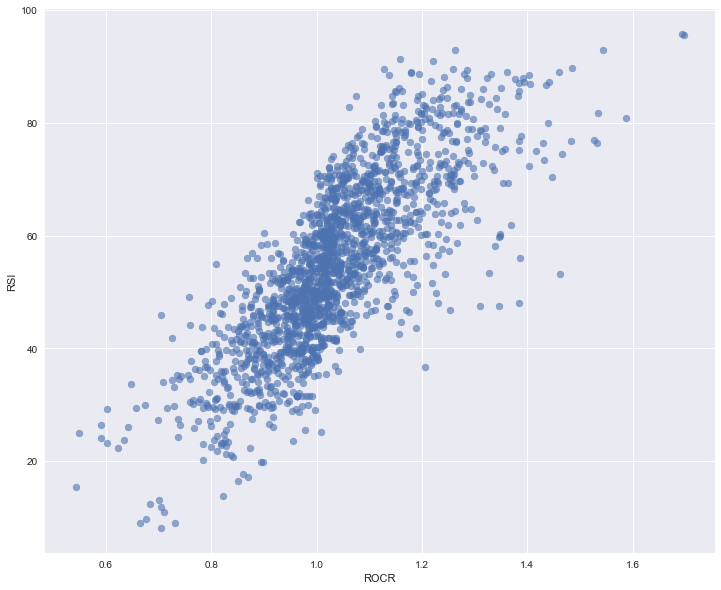

In [84]:
x = gold_VR['ROCR'].values
y = gold_VR['RSI'].values
plt.figure(figsize=[12,10])
plt.scatter(x,y,alpha=0.6)
plt.xlabel('ROCR')
plt.ylabel('RSI')

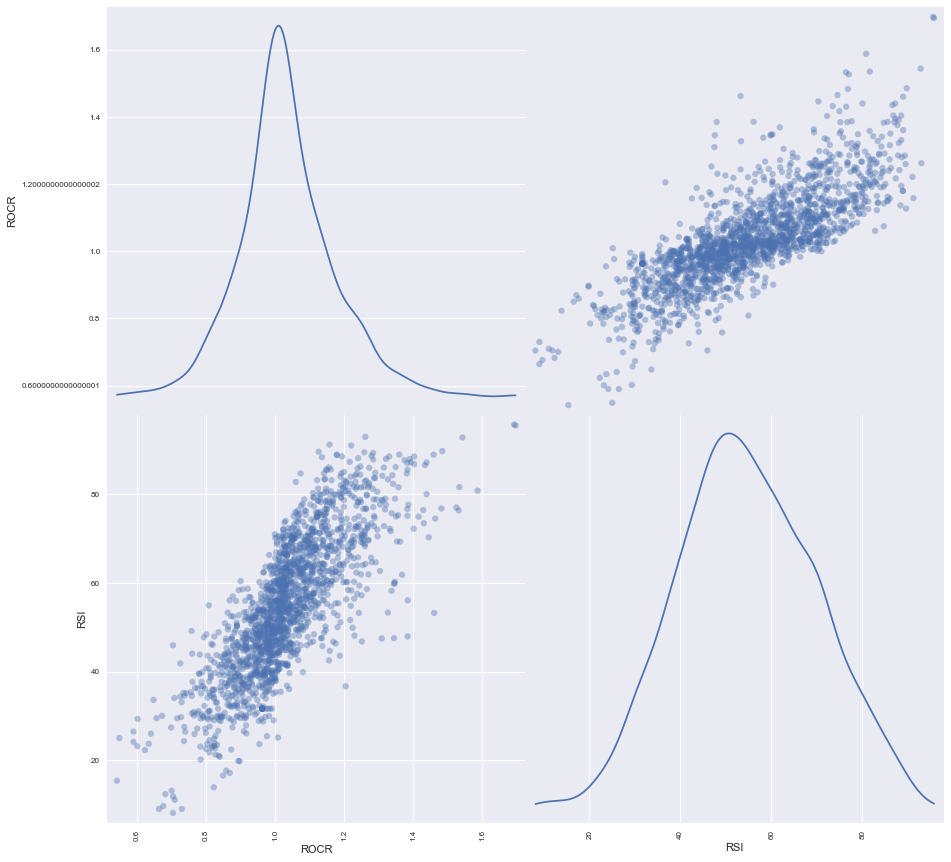

In [85]:
from pandas.plotting import scatter_matrix
fig_scatter=scatter_matrix(gold_VR.loc[:,['ROCR','RSI']], figsize=(15, 15), diagonal='kde', marker='o', s=40, alpha=0.4)


In [70]:
gold_VR

,Date,USD (PM),SMA10,SMA20,SMA30,MACD,MACDsignal,MACDhist,EMA12,EMA26,...,SINE,LEADSINE,INPHASE,QUADRATURE,APO,PPO,CMO,TRIX,profit,Volatility
0,2016-09-11,1324.60,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,0.000000,0.007207
1,2016-09-12,1324.60,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.000717,0.007110
2,2016-09-13,1323.65,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.001435,0.007017
3,2016-09-14,1321.75,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.008284,0.006928
4,2016-09-15,1310.80,610.802,606.3935,608.718000,5.956068,2.621448,3.334620,611.758333,608.693333,...,-0.437538,-0.945216,4.223394,0.904014,0.289487,0.047648,-36.727541,0.336072,-0.001869,0.006973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,1821.60,49093.547,48394.7485,47543.381333,1755.210453,1803.524835,-48.314382,49948.022008,49145.729833,...,-0.912095,-0.934847,-1167.524697,692.399758,986.273333,2.058184,33.408345,0.542504,-0.010677,0.006789
1822,2021-09-07,1802.15,49455.601,48796.1900,47811.490333,1906.923538,1824.204576,82.718963,50727.844292,49689.063705,...,0.926760,0.389692,-53.250602,2888.988696,1023.282244,2.123373,37.605671,0.547589,-0.008962,0.006930
1823,2021-09-08,1786.00,49246.753,48897.7555,47911.258000,1535.934833,1766.550627,-230.615795,49608.223065,49246.003135,...,0.813079,0.163290,1186.945742,2516.770176,918.503205,1.902319,-4.342653,0.549024,0.001260,0.006992
1824,2021-09-09,1788.25,48973.913,48864.9420,47902.755333,1169.473997,1647.135301,-477.661305,48599.696475,48758.676499,...,0.563104,-0.186169,1893.287141,1481.972548,737.819615,1.530244,-8.099856,0.546846,0.003551,0.006903


### 2.2 比特币的处理

In [48]:
bitCoin_VR = pd.read_csv('../data/bitCoin_VR.csv', index_col=0)

<AxesSubplot:>

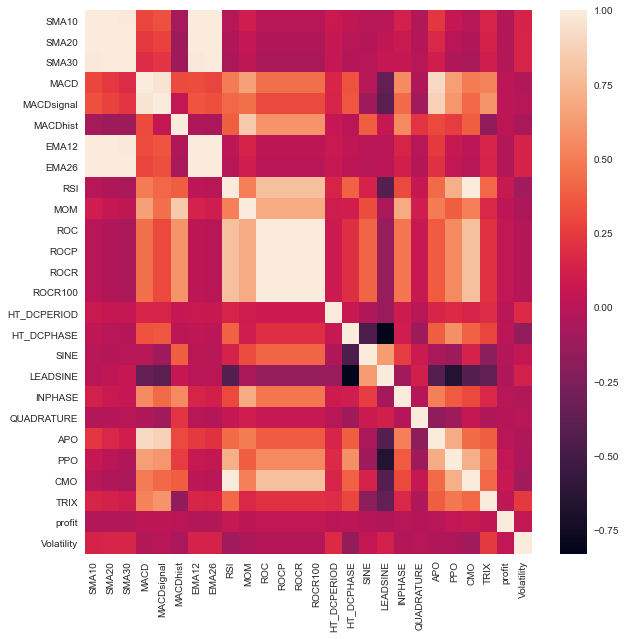

In [49]:
# 绘制热力图
bitCoin_features=bitCoin_VR.iloc[:, 2:]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(bitCoin_features.corr(),annot=False)

<AxesSubplot:>

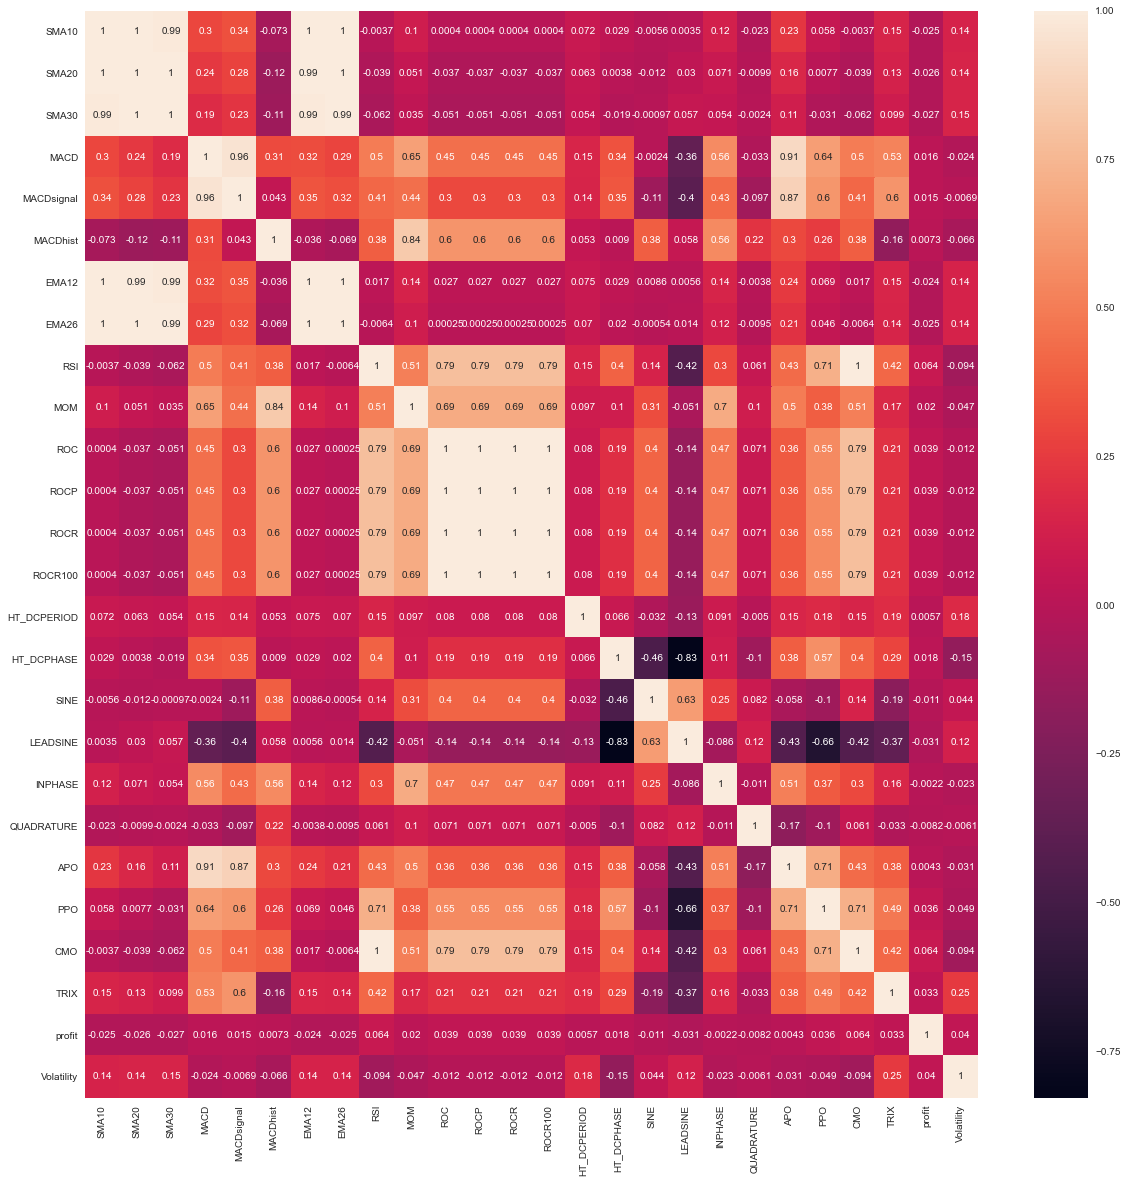

In [50]:
# 这个图用来观察相关系数的值
plt.figure(figsize=(20,20))
sns.heatmap(bitCoin_features.corr(),annot=True)

In [51]:
# 特征的名字
col_names = list(bitCoin_features.columns)

选出一些相关性高的特征

In [52]:
highCorr_features_bitCoin = Feature_Selection(bitCoin_features.corr(), 0.9)
feature_delete_bitCoin = highCorr_features_bitCoin
highCorr_features_bitCoin

['EMA26',
 'MACDsignal',
 'ROCP',
 'APO',
 'SMA10',
 'CMO',
 'EMA12',
 'ROC',
 'MACD',
 'SMA30',
 'ROCR100',
 'ROCR',
 'SMA20',
 'RSI']

### 可以发现黄金和比特币的特征之间相关性矩阵十分相似， 所以它们要删除的特征也都一致

##  3.特征重要性

[特征重要性原理](https://www.jianshu.com/p/5504c1f9e562)

这里使用 gain 作为特征重要性排序的因素， gain是某个特征作为节点， 其分裂所带来的平均信息增益

### 3.1 黄金的处理

In [53]:
gold_VR = pd.read_csv('../data/gold_VR.csv', index_col=0)

绘制特征重要性图

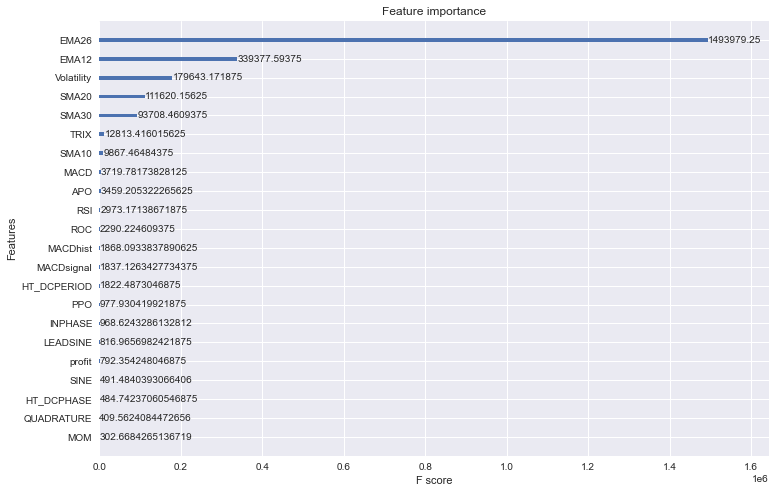

In [54]:
X_gold = gold_VR.iloc[:, 2:]
y_gold = gold_VR.iloc[:,1]
# fit model no training data
model_gold = XGBRegressor()
model_gold.fit(X_gold, y_gold)
# plot feature importance
_, ax = plt.subplots(1,1,figsize=[12, 8])
plot_importance(model_gold, ax=ax, importance_type='gain')
plt.show()

特征重要性数值 :  [4.3579899e-03 4.9297310e-02 4.1386567e-02 1.6428506e-03 8.1137131e-04
 8.2504796e-04 1.4988694e-01 6.5981954e-01 1.3131084e-03 1.3367424e-04
 1.0114833e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.0490590e-04
 2.1408765e-04 2.1706511e-04 3.6081488e-04 4.2779528e-04 1.8088422e-04
 1.5277663e-03 4.3190533e-04 0.0000000e+00 5.6590759e-03 3.4994516e-04
 7.9339840e-02]


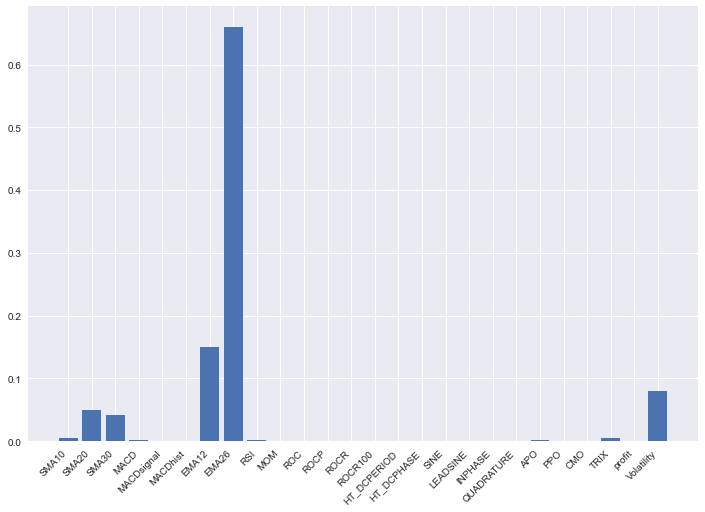

In [55]:
print('特征重要性数值 : ', model_gold.feature_importances_)
fig = plt.figure(figsize=[12, 8])
col_names = list(X_gold.columns)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x : col_names[int(x)]))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.bar(col_names, model_gold.feature_importances_)
plt.show()

###  3.2 比特币的处理

In [56]:
bitCoin_VR = pd.read_csv('../data/bitCoin_VR.csv', index_col=0)

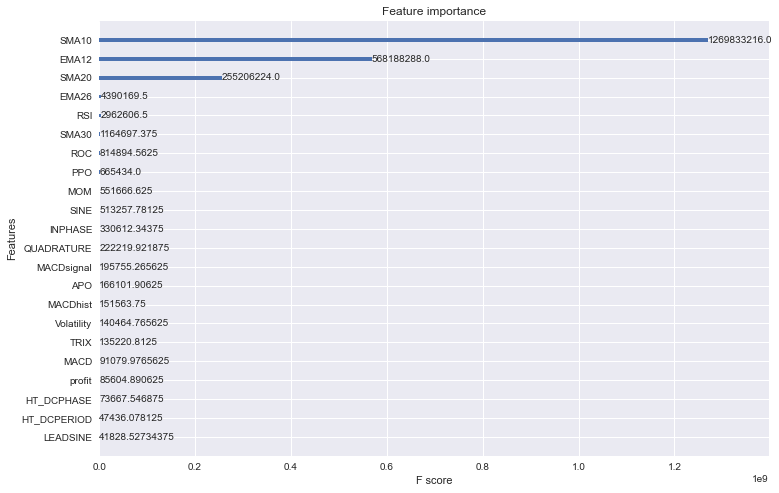

In [57]:
X_bitCoin = bitCoin_VR.iloc[:, 2:]
y_bitCoin = bitCoin_VR.iloc[:,1]
# fit model no training data
model_bitCoin = XGBRegressor()
model_bitCoin.fit(X_bitCoin, y_bitCoin)
# plot feature importance
_, ax = plt.subplots(1,1,figsize=[12, 8])
plot_importance(model_bitCoin, ax=ax, importance_type='gain')
plt.show()

特征重要性数值 :  [6.02967739e-01 1.21182159e-01 5.53045073e-04 4.32484267e-05
 9.29524540e-05 7.19685486e-05 2.69798607e-01 2.08462868e-03
 1.40676450e-03 2.61953450e-04 3.86944652e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.25245531e-05 3.49803086e-05
 2.43715389e-04 1.98618636e-05 1.56988011e-04 1.05518935e-04
 7.88718535e-05 3.15974758e-04 0.00000000e+00 6.42082668e-05
 4.06486361e-05 6.66983105e-05]


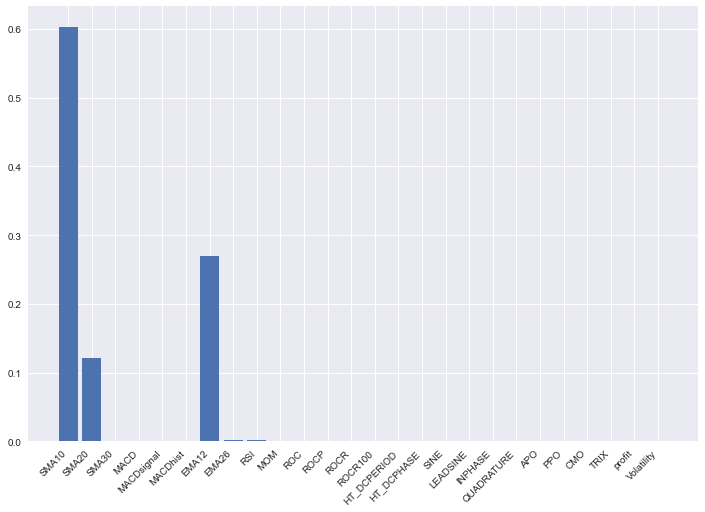

In [58]:
print('特征重要性数值 : ', model_bitCoin.feature_importances_)
fig = plt.figure(figsize=[12, 8])
col_names = list(X_bitCoin.columns)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x : col_names[int(x)]))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.bar(col_names, model_bitCoin.feature_importances_)
plt.show()

##  4.根据特征重要性进行特征选择

###  4.1 黄金的处理

把之前求出的相关性强的黄金的特征 按照特征重要性 排序为一个字典

In [59]:
names_importance_list = { name:val for name, val in zip(col_names, model_gold.feature_importances_)}
highCorr_features_gold = { name:names_importance_list[name] for name in highCorr_features_gold}
sorted(highCorr_features_gold.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)

[('EMA26', 0.65981954),
 ('EMA12', 0.14988694),
 ('SMA20', 0.04929731),
 ('SMA30', 0.041386567),
 ('SMA10', 0.00435799),
 ('MACD', 0.0016428506),
 ('APO', 0.0015277663),
 ('RSI', 0.0013131084),
 ('ROC', 0.0010114833),
 ('MACDsignal', 0.0008113713),
 ('ROCR100', 0.0),
 ('ROCR', 0.0),
 ('ROCP', 0.0),
 ('CMO', 0.0)]

只保留 EMA26 和 SMA20

In [60]:
feature_delete_gold.remove('EMA26')
feature_delete_gold.remove('SMA20')
feature_delete_gold

['MACDsignal',
 'ROCP',
 'APO',
 'SMA10',
 'CMO',
 'EMA12',
 'ROC',
 'MACD',
 'SMA30',
 'ROCR100',
 'ROCR',
 'RSI']

In [61]:
X_gold.drop(feature_delete_gold, axis=1, inplace=True)
X_gold

,SMA20,MACDhist,EMA26,MOM,HT_DCPERIOD,HT_DCPHASE,SINE,LEADSINE,INPHASE,QUADRATURE,PPO,TRIX,profit,Volatility
0,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.000000,0.007207
1,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.000717,0.007110
2,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.001435,0.007017
3,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.008284,0.006928
4,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.001869,0.006973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,48394.7485,-48.314382,49145.729833,4806.26,18.557396,245.796542,-0.912095,-0.934847,-1167.524697,692.399758,2.058184,0.542504,-0.010677,0.006789
1822,48796.1900,82.718963,49689.063705,3620.54,18.325259,112.064687,0.926760,0.389692,-53.250602,2888.988696,2.123373,0.547589,-0.008962,0.006930
1823,48897.7555,-230.615795,49246.003135,-2088.48,18.137593,125.602108,0.813079,0.163290,1186.945742,2516.770176,1.902319,0.549024,0.001260,0.006992
1824,48864.9420,-477.661305,48758.676499,-2728.40,18.054042,145.729270,0.563104,-0.186169,1893.287141,1481.972548,1.530244,0.546846,0.003551,0.006903


最终的黄金数据

In [62]:
df_gold =  pd.concat([gold_VR.iloc[:, :2], X_gold], axis=1)
df_gold

,Date,USD (PM),SMA20,MACDhist,EMA26,MOM,HT_DCPERIOD,HT_DCPHASE,SINE,LEADSINE,INPHASE,QUADRATURE,PPO,TRIX,profit,Volatility
0,2016-09-11,1324.60,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.000000,0.007207
1,2016-09-12,1324.60,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.000717,0.007110
2,2016-09-13,1323.65,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.001435,0.007017
3,2016-09-14,1321.75,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.008284,0.006928
4,2016-09-15,1310.80,606.3935,3.334620,608.693333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.001869,0.006973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,1821.60,48394.7485,-48.314382,49145.729833,4806.26,18.557396,245.796542,-0.912095,-0.934847,-1167.524697,692.399758,2.058184,0.542504,-0.010677,0.006789
1822,2021-09-07,1802.15,48796.1900,82.718963,49689.063705,3620.54,18.325259,112.064687,0.926760,0.389692,-53.250602,2888.988696,2.123373,0.547589,-0.008962,0.006930
1823,2021-09-08,1786.00,48897.7555,-230.615795,49246.003135,-2088.48,18.137593,125.602108,0.813079,0.163290,1186.945742,2516.770176,1.902319,0.549024,0.001260,0.006992
1824,2021-09-09,1788.25,48864.9420,-477.661305,48758.676499,-2728.40,18.054042,145.729270,0.563104,-0.186169,1893.287141,1481.972548,1.530244,0.546846,0.003551,0.006903


### 4.2 比特币的处理

In [63]:
names_importance_list = { name:val for name, val in zip(col_names, model_bitCoin.feature_importances_)}
highCorr_features_bitCoin = { name:names_importance_list[name] for name in highCorr_features_bitCoin}
sorted(highCorr_features_bitCoin.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)

[('SMA10', 0.60296774),
 ('EMA12', 0.2697986),
 ('SMA20', 0.12118216),
 ('EMA26', 0.0020846287),
 ('RSI', 0.0014067645),
 ('SMA30', 0.0005530451),
 ('ROC', 0.00038694465),
 ('MACDsignal', 9.2952454e-05),
 ('APO', 7.887185e-05),
 ('MACD', 4.3248427e-05),
 ('ROCR100', 0.0),
 ('ROCR', 0.0),
 ('ROCP', 0.0),
 ('CMO', 0.0)]

只保留 SMA10 EMA12

In [64]:
feature_delete_bitCoin.remove('EMA12')
feature_delete_bitCoin.remove('SMA10')
feature_delete_bitCoin

['EMA26',
 'MACDsignal',
 'ROCP',
 'APO',
 'CMO',
 'ROC',
 'MACD',
 'SMA30',
 'ROCR100',
 'ROCR',
 'SMA20',
 'RSI']

In [65]:
X_bitCoin.drop(feature_delete_bitCoin, axis=1, inplace=True)
X_bitCoin

,SMA10,MACDhist,EMA12,MOM,HT_DCPERIOD,HT_DCPHASE,SINE,LEADSINE,INPHASE,QUADRATURE,PPO,TRIX,profit,Volatility
0,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.019271,0.041424
1,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.002050,0.040234
2,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.003437,0.038579
3,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.002562,0.037110
4,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.002081,0.035722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,49093.547,-48.314382,49948.022008,4806.26,18.557396,245.796542,-0.912095,-0.934847,-1167.524697,692.399758,2.058184,0.542504,0.017546,0.032142
1822,49455.601,82.718963,50727.844292,3620.54,18.325259,112.064687,0.926760,0.389692,-53.250602,2888.988696,2.123373,0.547589,-0.111399,0.031565
1823,49246.753,-230.615795,49608.223065,-2088.48,18.137593,125.602108,0.813079,0.163290,1186.945742,2516.770176,1.902319,0.549024,-0.015612,0.046123
1824,48973.913,-477.661305,48599.696475,-2728.40,18.054042,145.729270,0.563104,-0.186169,1893.287141,1481.972548,1.530244,0.546846,0.006300,0.044519


最终的比特币数据

In [66]:
df_bitCoin =  pd.concat([bitCoin_VR.iloc[:, :2], X_bitCoin], axis=1)
df_bitCoin

,Date,Value,SMA10,MACDhist,EMA12,MOM,HT_DCPERIOD,HT_DCPHASE,SINE,LEADSINE,INPHASE,QUADRATURE,PPO,TRIX,profit,Volatility
0,2016-09-11,621.65,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.019271,0.041424
1,2016-09-12,609.67,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.002050,0.040234
2,2016-09-13,610.92,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.003437,0.038579
3,2016-09-14,608.82,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,0.002562,0.037110
4,2016-09-15,610.38,610.802,3.334620,611.758333,-22.77,15.646696,205.946888,-0.437538,-0.945216,4.223394,0.904014,0.047648,0.336072,-0.002081,0.035722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,51769.06,49093.547,-48.314382,49948.022008,4806.26,18.557396,245.796542,-0.912095,-0.934847,-1167.524697,692.399758,2.058184,0.542504,0.017546,0.032142
1822,2021-09-07,52677.40,49455.601,82.718963,50727.844292,3620.54,18.325259,112.064687,0.926760,0.389692,-53.250602,2888.988696,2.123373,0.547589,-0.111399,0.031565
1823,2021-09-08,46809.17,49246.753,-230.615795,49608.223065,-2088.48,18.137593,125.602108,0.813079,0.163290,1186.945742,2516.770176,1.902319,0.549024,-0.015612,0.046123
1824,2021-09-09,46078.38,48973.913,-477.661305,48599.696475,-2728.40,18.054042,145.729270,0.563104,-0.186169,1893.287141,1481.972548,1.530244,0.546846,0.006300,0.044519


保存数据

In [67]:
df_gold.to_csv('../data/gold_select.csv')
df_bitCoin.to_csv('../data/bitCoin_select.csv')